Cuaderno de Jupyter Desarrollado por **Pedro J. Torres-González** en el marco del Proyecto Europeo CitriData.

**Contacto:** z32togop@uco.es

[CitriData Web](https://www.uco.es/citridata/)

[Linkedin CitriData](https://www.linkedin.com/company/citridata/)


Basado en el desarrollo previo de PUTVision--DeepNess

[GitHub DeepNess](https://github.com/PUTvision/qgis-plugin-deepness?tab=readme-ov-file)

## Uso Simple

Podemos usar el modelo rapidamente con solo dos lineas.

Lo suyo es encontrar los parametros que hacen que el modelo funcione mejor y editar CitrusDetector.py para usar estos parametros en el metodo directo.

INFO:CitrusDetector:Modelo cargado exitosamente:
INFO:CitrusDetector:  - Input: images, Shape: [1, 3, 640, 640]
INFO:CitrusDetector:  - Outputs: ['output0', '1732']
INFO:CitrusDetector:Procesador inicializado para modelo: yolov9_trees.onnx
INFO:CitrusDetector:Preprocesamiento: (300, 682, 3) -> (1, 3, 640, 640)
INFO:CitrusDetector:Ejecutando inferencia con input tipo: float32


🌳 CitrusDetector_vf inicializado:
   📁 Modelo: models/yolov9_trees.onnx
   🎯 Confianza mínima: 0.5
   🔄 NMS threshold: 0.4
   📐 Tamaño entrada: (640, 640)


INFO:CitrusDetector:Output output0: shape (1, 5, 8400)
INFO:CitrusDetector:Output 1732: shape (1, 5, 8400)
INFO:CitrusDetector:Output original shape: (1, 5, 8400)
INFO:CitrusDetector:Output transpuesto: (8400, 5)
INFO:CitrusDetector:Detecciones válidas: 879 / 8400
INFO:CitrusDetector:Detecciones después de NMS: 155
INFO:CitrusDetector:✅ Detecciones finales: 155 copas detectadas


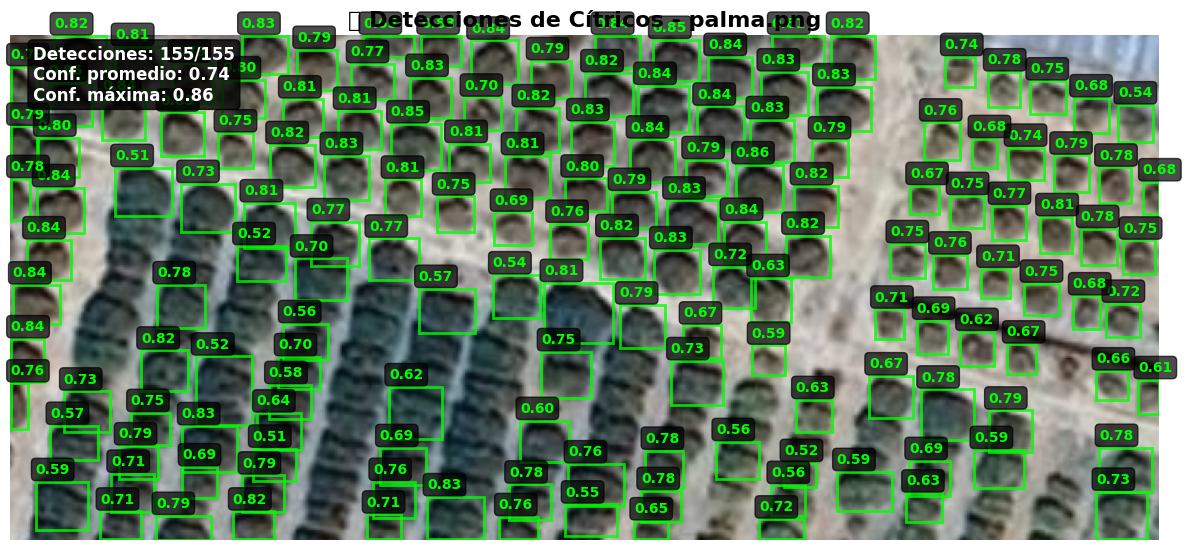

In [17]:
from CitrusDetector import CitrusDetector_vf

# Crear detector
detector = CitrusDetector_vf("models/yolov9_trees.onnx")

# Usar en una línea
detections, count = detector.detect_and_visualize("data/palma.png")



## Uso Avanzado

Con el uso avanzado podemos manejar los parametros mencionados anteriormente para obtener mas/menos detecciones con mas/menos confianza. 

INFO:CitrusDetector:Modelo cargado exitosamente:
INFO:CitrusDetector:  - Input: images, Shape: [1, 3, 640, 640]
INFO:CitrusDetector:  - Outputs: ['output0', '1732']
INFO:CitrusDetector:Procesador inicializado para modelo: yolov9_trees.onnx
INFO:CitrusDetector:Preprocesamiento: (300, 682, 3) -> (1, 3, 640, 640)
INFO:CitrusDetector:Ejecutando inferencia con input tipo: float32


🌳 CitrusDetector_vf inicializado:
   📁 Modelo: models/yolov9_trees.onnx
   🎯 Confianza mínima: 0.1
   🔄 NMS threshold: 0.1
   📐 Tamaño entrada: (640, 640)


INFO:CitrusDetector:Output output0: shape (1, 5, 8400)
INFO:CitrusDetector:Output 1732: shape (1, 5, 8400)
INFO:CitrusDetector:Output original shape: (1, 5, 8400)
INFO:CitrusDetector:Output transpuesto: (8400, 5)
INFO:CitrusDetector:Detecciones válidas: 1546 / 8400
INFO:CitrusDetector:Detecciones después de NMS: 201
INFO:CitrusDetector:✅ Detecciones finales: 201 copas detectadas
INFO:CitrusDetector:Visualización guardada en: resultado.png


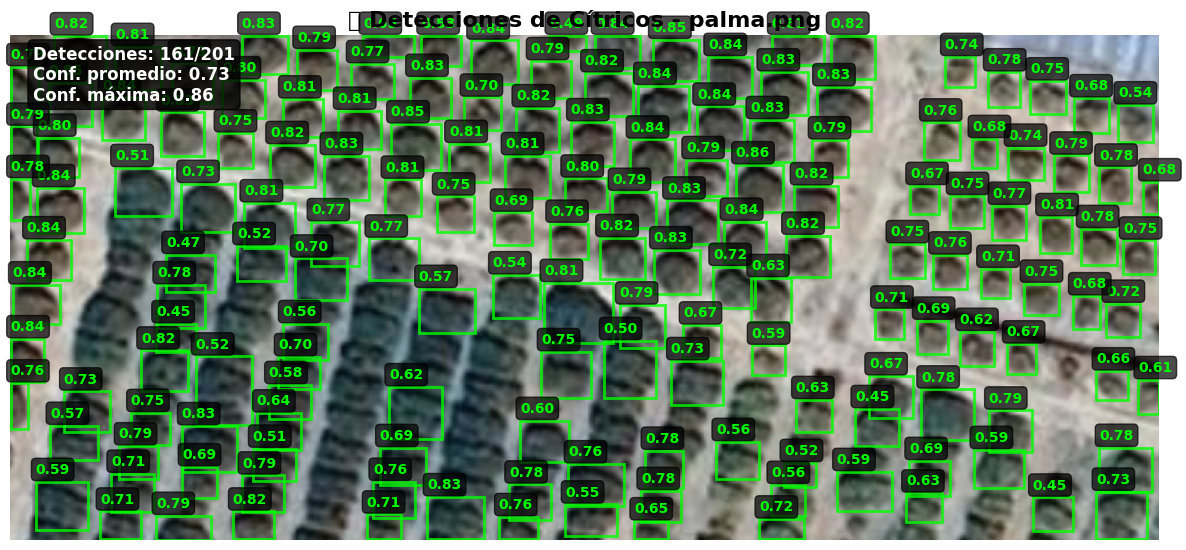

Total: 201, Promedio conf: 0.639


In [25]:
from CitrusDetector import CitrusDetector_vf

# Configurar detector
detector = CitrusDetector_vf(
    model_path="models/yolov9_trees.onnx",
    confidence_threshold=0.1,
    nms_threshold=0.1
)

# Detectar con umbral personalizado
detections, count = detector.detect_and_visualize(
    image_path="data/palma.png",
    confidence_threshold=0.45,
    save_path="resultado.png",
)

# Obtener estadísticas detalladas
stats = detector.get_statistics(detections)
print(f"Total: {stats['total']}, Promedio conf: {stats['confidence']['mean']:.3f}")

## Uso Paso a Paso

Esta es la mejor forma de estudiar lo que hace esta clase y de extraer las variables intermedias que el metodo directo no te proporciona. Esta es la forma correcta de comprobar que todo funciona bien, detectar errores y corregirlos.

INFO:CitrusDetector:Modelo cargado exitosamente:
INFO:CitrusDetector:  - Input: images, Shape: [1, 3, 640, 640]
INFO:CitrusDetector:  - Outputs: ['output0', '1732']
INFO:CitrusDetector:Procesador inicializado para modelo: yolov9_trees.onnx
INFO:CitrusDetector:Preprocesamiento: (300, 682, 3) -> (1, 3, 640, 640)
INFO:CitrusDetector:Ejecutando inferencia con input tipo: float32


🌳 CitrusDetector_vf inicializado:
   📁 Modelo: models/yolov9_trees.onnx
   🎯 Confianza mínima: 0.4
   🔄 NMS threshold: 0.1
   📐 Tamaño entrada: (640, 640)


INFO:CitrusDetector:Output output0: shape (1, 5, 8400)
INFO:CitrusDetector:Output 1732: shape (1, 5, 8400)
INFO:CitrusDetector:Output original shape: (1, 5, 8400)
INFO:CitrusDetector:Output transpuesto: (8400, 5)
INFO:CitrusDetector:Detecciones válidas: 1023 / 8400
INFO:CitrusDetector:Detecciones después de NMS: 162
INFO:CitrusDetector:✅ Detecciones finales: 162 copas detectadas


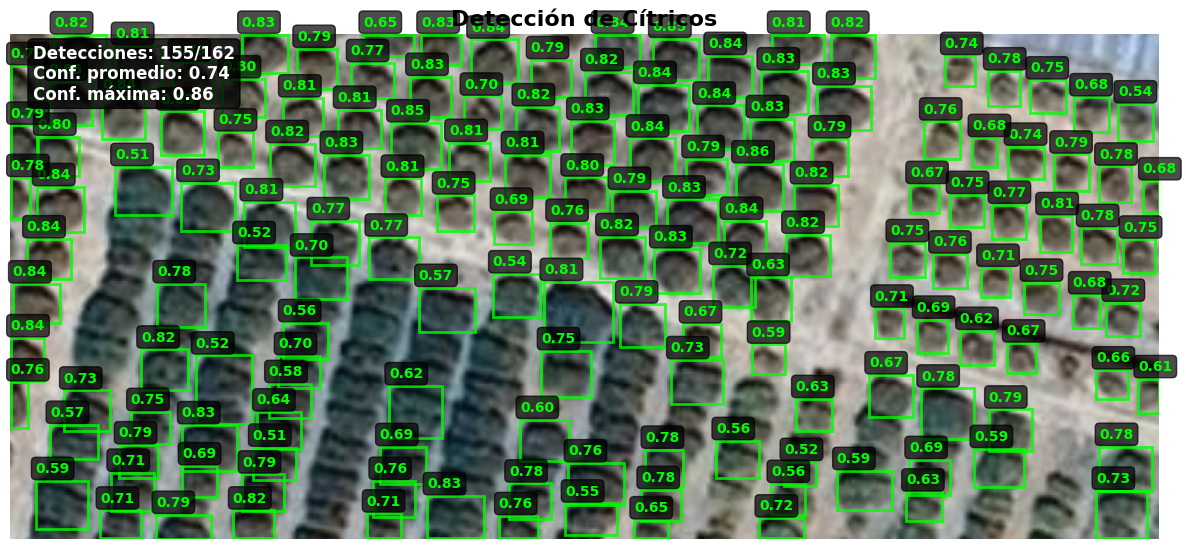

155

In [13]:
import cv2
from CitrusDetector import CitrusDetector_vf

# Configurar detector
detector = CitrusDetector_vf(
    model_path="models/yolov9_trees.onnx",
    confidence_threshold=0.4,
    nms_threshold=0.1
)

# Control total del proceso
# raw image
image = cv2.imread("data/palma.png")
# preprocessed image = input del modelo (Se trata de un tensor de 4 dimensiones)
preprocessed = detector.preprocess_image(image)
# raw_results = output del modelo
raw_results = detector.run_inference(preprocessed)
# postprocessed detections = output del modelo + coordenadas de las detecciones
detections = detector.postprocess_results(raw_results, image)

# Visualizar
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detector.visualize_detections(image_rgb, detections)

📊 Información del tensor preprocesado:
   Shape original: (1, 3, 640, 640)
   Rango valores: [0.020, 0.957]
   Shape para visualización: (640, 640, 3)


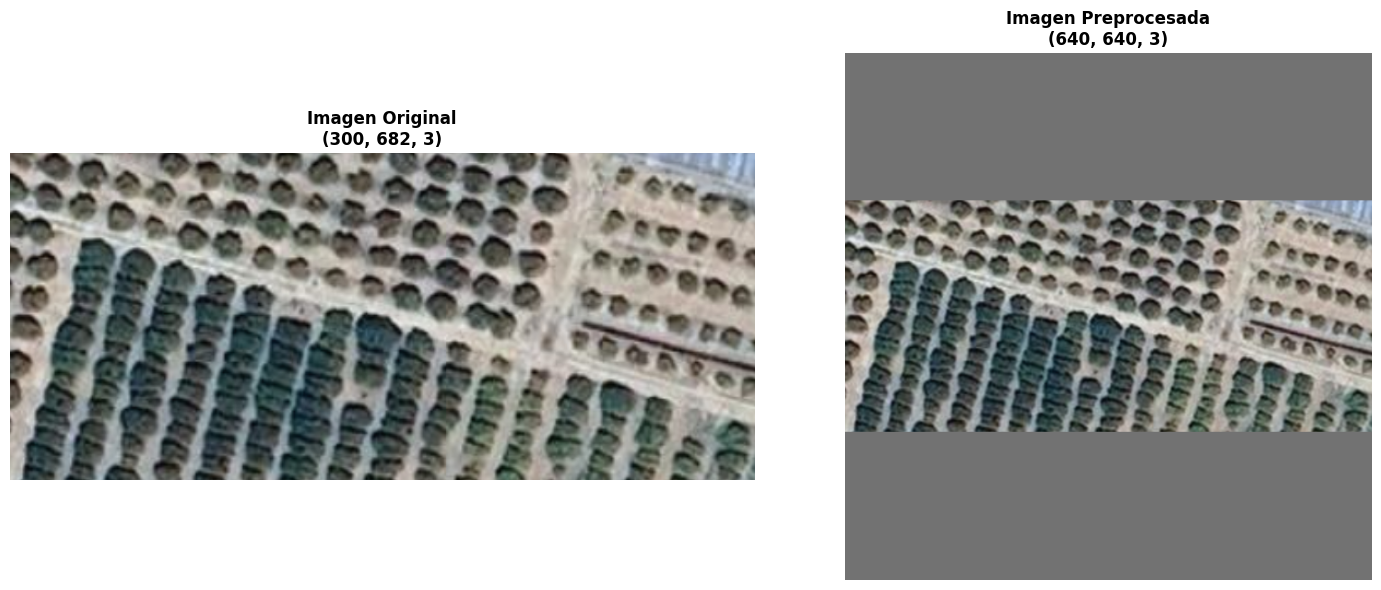

✅ Visualización completada correctamente
   La imagen preprocesada mantiene el contenido pero:
   - Redimensionada a 640x640
   - Con padding gris para mantener aspect ratio
   - Normalizada para el modelo


In [ ]:
#
# Esta celda solo es para tener una idea de lo que le entra al modelo, imagino que cuanto mas
# parecida sea la raw_image a una definicion de 640x640 habra menos deformacion de la imagen
# y por tanto menos padding gris lo que seguramente lleve a mejores predicciones.
#
#

# Convertir tensor preprocesado de vuelta a formato imagen para visualización
import matplotlib.pyplot as plt
import numpy as np

def tensor_to_image(tensor):
    """
    Convierte tensor preprocesado [1, 3, 640, 640] a imagen visualizable.
    
    Args:
        tensor: Tensor con forma [1, 3, 640, 640] y valores [0-1]
    
    Returns:
        np.ndarray: Imagen en formato HWC con valores [0-255]
    """
    # Remover dimensión batch: [1, 3, 640, 640] -> [3, 640, 640]
    tensor_no_batch = tensor[0]
    
    # Convertir CHW -> HWC: [3, 640, 640] -> [640, 640, 3]
    image_hwc = np.transpose(tensor_no_batch, (1, 2, 0))
    
    # Desnormalizar [0-1] -> [0-255]
    image_uint8 = (image_hwc * 255).astype(np.uint8)
    
    return image_hwc, image_uint8

# Convertir tensor a imagen
preprocessed_float, preprocessed_uint8 = tensor_to_image(preprocessed)

print(f"📊 Información del tensor preprocesado:")
print(f"   Shape original: {preprocessed.shape}")
print(f"   Rango valores: [{preprocessed.min():.3f}, {preprocessed.max():.3f}]")
print(f"   Shape para visualización: {preprocessed_uint8.shape}")

# Mostrar comparación: imagen original vs preprocesada
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Imagen original
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
axes[0].imshow(image_rgb)
axes[0].set_title(f'Imagen Original\n{image_rgb.shape}', fontweight='bold')
axes[0].axis('off')

# Imagen preprocesada
axes[1].imshow(preprocessed_uint8)
axes[1].set_title(f'Imagen Preprocesada\n{preprocessed_uint8.shape}', fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"✅ Visualización completada correctamente")
print(f"   La imagen preprocesada mantiene el contenido pero:")
print(f"   - Redimensionada a 640x640")
print(f"   - Con padding gris para mantener aspect ratio") 
print(f"   - Normalizada para el modelo")

## 💡 **Tips y Recomendaciones para Uso Óptimo**

### 🎯 **Ajuste de Parámetros**

#### **1. Umbral de Confianza (`confidence_threshold`)**
- **0.3-0.4**: Detecta más objetos, incluyendo algunos falsos positivos
- **0.5-0.6**: Balance entre precisión y recall
- **0.7-0.8**: Solo detecciones muy seguras, puede perder algunos objetos reales

#### **2. Umbral NMS (`nms_threshold`)**
- **0.3-0.4**: Elimina agresivamente duplicados (recomendado para objetos separados)
- **0.5-0.6**: Balance estándar
- **0.7-0.8**: Permite más superposición entre detecciones

### 🔧 **Optimización del Rendimiento**

```python
# Para imágenes grandes, considera redimensionar antes:
image_resized = cv2.resize(image, (1024, 768))  # Reduce tiempo de procesamiento

# Para procesamiento batch:
images = ["img1.jpg", "img2.jpg", "img3.jpg"]
for img_path in images:
    detections, count = detector.detect_and_visualize(img_path)
```

### 🎨 **Personalización de Visualización**

```python
# Cambiar colores y estilos en visualize_detections():
detector.visualize_detections(
    image_rgb, 
    detections,
    confidence_threshold=0.6,
    title="Mi Detección Personalizada",
    figsize=(16, 10)
)
```

### 📊 **Análisis de Resultados**

```python
# Filtrar detecciones por área
large_trees = [d for d in detections if d['area'] > 1000]
small_trees = [d for d in detections if d['area'] < 500]

# Filtrar por posición
left_side = [d for d in detections if d['center'][0] < image.shape[1]/2]

# Análisis estadístico
stats = detector.get_statistics(detections)
print(f"Distribución por confianza: {stats['by_confidence']}")
```

### ⚠️ **Problemas Comunes y Soluciones**

1. **Error de memoria**: Redimensiona imágenes muy grandes antes del procesamiento
2. **Pocas detecciones**: Reduce `confidence_threshold` o verifica iluminación de la imagen
3. **Muchos duplicados**: Reduce `nms_threshold`
4. **Coordenadas incorrectas**: Verifica que la imagen se carga correctamente
